In [1]:
import numpy as np
import os
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing import image
import matplotlib.pyplot as plt
import time
import pandas as pd
import warnings
#pd.set_option('display.max_colwidth', None)

In [2]:
import warnings

warnings.simplefilter("ignore")

## Loading Data Set

In [3]:
df = pd.read_csv('./final_image_data.csv')

## Splitting the Data

In [6]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values
X = X.astype('float32')
y = y.astype('int')

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
num_images = len(X)
num_train = 21000
num_val = 3000
num_test = 6000

# Calculate the remaining images after splitting training and validation
remaining_images = num_images - num_train - num_val

# testing and validation sets (6k test, 3k val)
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=(num_test / num_images), stratify=y, random_state=25)

# validation and testing sets (3k val, 6k test)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=(num_val / remaining_images), stratify=y_remaining, random_state=25)

In [14]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (24000, 784) (24000,)
Validation set shape: (3000, 784) (3000,)
Testing set shape: (3000, 784) (3000,)


In [15]:
from keras.utils import to_categorical

In [16]:
num_classes = 3
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_val_encoded = to_categorical(y_val, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)

In [17]:
y_train_encoded

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [18]:
X_train.dtype

dtype('float32')

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)

train_datagen = ImageDataGenerator()
train_generator = train_datagen.flow(X_train, y_train_encoded, batch_size=200)


val_datagen = ImageDataGenerator()
val_generator = val_datagen.flow(X_val, y_val_encoded, batch_size=200)

In [21]:
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow(X_test, y_test, batch_size=200)

In [22]:
def print_batch_data(generator, num_batches=1): #testing only
    for i in range(num_batches):
        # Get a batch of data
        batch_x, batch_y = next(generator)
        
        print(f"Batch {i+1} - X shape: {batch_x.shape}, Y shape: {batch_y.shape}")
        print("First image in batch:")
        print(batch_x[0])
        print("First label in batch:")
        print(batch_y[0])


In [23]:
#print_batch_data(train_generator, num_batches=1)

Batch 1 - X shape: (200, 28, 28, 1), Y shape: (200, 3)
First image in batch:
[[[0.28627452]
  [0.3137255 ]
  [0.33333334]
  [0.30588236]
  [0.2901961 ]
  [0.1764706 ]
  [0.1254902 ]
  [0.14509805]
  [0.13333334]
  [0.13333334]
  [0.15294118]
  [0.3764706 ]
  [0.45490196]
  [0.44705883]
  [0.43529412]
  [0.42352942]
  [0.4117647 ]
  [0.41960785]
  [0.39215687]
  [0.4       ]
  [0.3764706 ]
  [0.33333334]
  [0.34117648]
  [0.36078432]
  [0.3647059 ]
  [0.34117648]
  [0.3254902 ]
  [0.3254902 ]]

 [[0.29803923]
  [0.27058825]
  [0.29803923]
  [0.30588236]
  [0.3019608 ]
  [0.25882354]
  [0.20392157]
  [0.13333334]
  [0.13725491]
  [0.31764707]
  [0.47843137]
  [0.4509804 ]
  [0.42745098]
  [0.43137255]
  [0.42352942]
  [0.41568628]
  [0.42352942]
  [0.4       ]
  [0.39215687]
  [0.39607844]
  [0.34509805]
  [0.3137255 ]
  [0.32941177]
  [0.3529412 ]
  [0.34509805]
  [0.3372549 ]
  [0.3137255 ]
  [0.29411766]]

 [[0.29411766]
  [0.29803923]
  [0.27058825]
  [0.25882354]
  [0.28627452]
  [0

In [24]:
#print_batch_data(val_generator, num_batches=1)

Batch 1 - X shape: (200, 28, 28, 1), Y shape: (200, 3)
First image in batch:
[[[0.7372549 ]
  [0.7372549 ]
  [0.7294118 ]
  [0.7254902 ]
  [0.7254902 ]
  [0.72156864]
  [0.72156864]
  [0.7294118 ]
  [0.73333335]
  [0.7411765 ]
  [0.7411765 ]
  [0.74509805]
  [0.74509805]
  [0.7490196 ]
  [0.7372549 ]
  [0.7176471 ]
  [0.7294118 ]
  [0.73333335]
  [0.73333335]
  [0.7647059 ]
  [0.77254903]
  [0.74509805]
  [0.627451  ]
  [0.49411765]
  [0.40784314]
  [0.3882353 ]
  [0.3764706 ]
  [0.36862746]]

 [[0.7294118 ]
  [0.7254902 ]
  [0.7254902 ]
  [0.72156864]
  [0.72156864]
  [0.7254902 ]
  [0.73333335]
  [0.74509805]
  [0.7490196 ]
  [0.7490196 ]
  [0.7411765 ]
  [0.73333335]
  [0.72156864]
  [0.74509805]
  [0.7490196 ]
  [0.73333335]
  [0.7490196 ]
  [0.7490196 ]
  [0.7490196 ]
  [0.7882353 ]
  [0.8039216 ]
  [0.78039217]
  [0.65882355]
  [0.5176471 ]
  [0.42352942]
  [0.41960785]
  [0.40392157]
  [0.39215687]]

 [[0.72156864]
  [0.73333335]
  [0.74509805]
  [0.7372549 ]
  [0.73333335]
  [0

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Input

In [26]:
base_model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(64, (3, 3), strides=1, activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), strides=1, activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), strides=1, activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

In [27]:
base_model.compile(optimizer='adam', 
                   loss='categorical_crossentropy', 
                   metrics=['accuracy'])

In [28]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [29]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-4)

In [30]:
start_time = time.time()
history = base_model.fit(train_generator,
                         epochs=20,
                         validation_data=val_generator,shuffle=True,
                         callbacks=[early_stopping, reduce_lr])


end_time = time.time()
training_time = end_time - start_time

print("Training time:", training_time, "seconds")

Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 28s 216ms/step - accuracy: 0.6031 - loss: 0.8517 - val_accuracy: 0.8750 - val_loss: 0.3583 - learning_rate: 0.0010
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 26s 212ms/step - accuracy: 0.8879 - loss: 0.3073 - val_accuracy: 0.9017 - val_loss: 0.2586 - learning_rate: 0.0010
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 26s 216ms/step - accuracy: 0.9063 - loss: 0.2563 - val_accuracy: 0.9163 - val_loss: 0.2233 - learning_rate: 0.0010
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 26s 219ms/step - accuracy: 0.9195 - loss: 0.2199 - val_accuracy: 0.9100 - val_loss: 0.2264 - learning_rate: 0.0010
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 26s 216ms/step - accuracy: 0.9258 - loss: 0.1964 - val_accuracy: 0.9197 - val_loss: 0.2091 - learning_rate: 0.0010
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 26s 215ms/step - accuracy: 0.9338 - loss: 0.1744 - val_accuracy: 0.9217 - val_loss: 0.1970 - learning_rate: 0.0010
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 26s 216ms/step - accuracy: 0.9

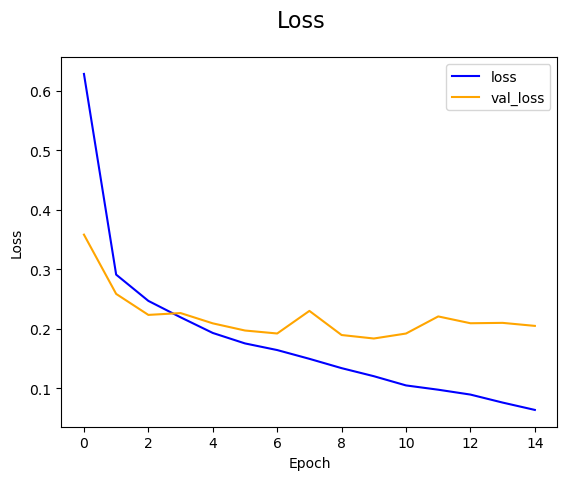

In [37]:
fig = plt.figure()
plt.plot(history.history['loss'], color='blue', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=16)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

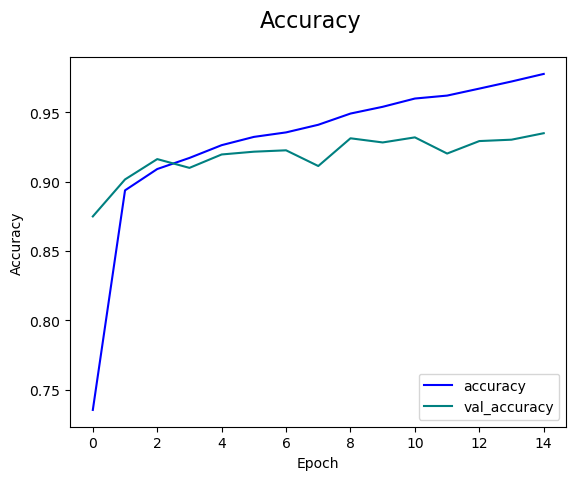

In [38]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='blue', label='accuracy')
plt.plot(history.history['val_accuracy'], color='teal', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=16)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

## Test

In [39]:
from tensorflow.keras.utils import to_categorical

y_true_encoded = to_categorical(y, num_classes=num_classes)

In [40]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [41]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [43]:
X_test

array([[[[0.21960784],
         [0.17254902],
         [0.2       ],
         ...,
         [0.44313726],
         [0.42745098],
         [0.41960785]],

        [[0.17254902],
         [0.15294118],
         [0.15686275],
         ...,
         [0.4392157 ],
         [0.47058824],
         [0.4509804 ]],

        [[0.14509805],
         [0.16862746],
         [0.14509805],
         ...,
         [0.3882353 ],
         [0.65882355],
         [0.9137255 ]],

        ...,

        [[0.15686275],
         [0.18431373],
         [0.61960787],
         ...,
         [0.28235295],
         [0.3254902 ],
         [0.45490196]],

        [[0.14509805],
         [0.22745098],
         [0.6666667 ],
         ...,
         [0.6       ],
         [0.5921569 ],
         [0.57254905]],

        [[0.17254902],
         [0.27058825],
         [0.84313726],
         ...,
         [0.6039216 ],
         [0.6       ],
         [0.57254905]]],


       [[[0.5411765 ],
         [0.54509807],
         [0.52

In [44]:
base_model.predict(X_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


array([[5.1924573e-08, 1.1292363e-05, 9.9998868e-01],
       [1.9076742e-04, 7.2161220e-03, 9.9259311e-01],
       [9.9992347e-01, 7.6221855e-05, 3.1911566e-07],
       ...,
       [4.3137240e-01, 5.1536089e-01, 5.3266723e-02],
       [4.3068832e-01, 1.9972043e-02, 5.4933959e-01],
       [8.7139922e-01, 1.1638978e-01, 1.2211062e-02]], dtype=float32)

In [47]:
y_test

array([2, 2, 0, ..., 1, 1, 1])

In [46]:
from sklearn.metrics import accuracy_score

predicted_labels = np.argmax(base_model.predict(X_test), axis=1)

accuracy = accuracy_score(y_test, predicted_labels)

print("Accuracy:", accuracy)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Accuracy: 0.9246666666666666


In [48]:
predicted_labels

array([2, 2, 0, ..., 1, 2, 0], dtype=int64)

## Save Model

In [49]:
#base_model.save(os.path.join('Model','Numerical_SignLanguage_identifier.h5')) #ignore warning

## Load Model

In [2]:
from tensorflow.keras.models import load_model
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import matplotlib.image as mpimg

In [3]:
os.path.join('Model','Numerical_SignLanguage_identifier.h5')

'Model\\Numerical_SignLanguage_identifier.h5'

In [4]:
label_to_class = {0: 'one', 1: 'three', 2: 'four'}

In [5]:
def plot_image_with_prediction(image_path, model, label_to_class):
    """
    Load an image, convert it to grayscale, make a prediction using the provided model,
    and plot the image with the predicted class name.

    Args:
    - image_path: The path to the image file.
    - model: The trained model to use for making predictions.
    - label_to_class: A dictionary mapping class indices to class names.
    """
    img = cv2.imread(image_path)
    
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    resized_img = cv2.resize(gray_img, (28, 28))
    normalized_img = resized_img / 255.0

    input_img = np.expand_dims(normalized_img, axis=-1)

    y_pred = model.predict(np.expand_dims(input_img, axis=0))

    predicted_class_index = np.argmax(y_pred)
    
    image_to_show = input_img.squeeze()

    plt.figure(figsize=(1, 1))  # Adjust the size as needed
    plt.imshow(image_to_show, cmap='gray')  # Plot grayscale image
    plt.axis('off')  # Turn off axis labels

    predicted_class_name = label_to_class[predicted_class_index]
    
    print("Predicted class name:", predicted_class_name)
    print(y_pred)
    
    plt.show()

In [7]:
Test_model = load_model(os.path.join('Model','Numerical_SignLanguage_identifier.h5')) #ignore warning

In [8]:
Test_model.compile(optimizer='adam', 
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

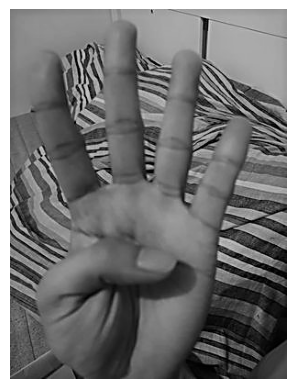

In [12]:
image_path = os.path.join(os.getcwd(), 'Emman_testing.jpg')
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
Predicted class name: four
[[9.4132661e-04 1.2052106e-03 9.9785346e-01]]


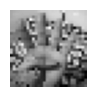

In [9]:
#testing single image
image_path = os.path.join(os.getcwd(), 'Emman_testing.jpg')
plot_image_with_prediction(image_path, Test_model, label_to_class)

In [ ]:
#my heart